# Challenge 2

In [1]:
# sospechosos habituales
import pandas as pd
import numpy as np

# visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# fechas
import datetime

#### Import the titanic file. Name your dataset `titanic`.

In [4]:
titanic = pd.read_csv('data/titanic.csv', low_memory = False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [6]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [17]:
# variables numéricas

numericas = titanic.select_dtypes(include = 'number')


numericas.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [16]:
# variables categóricas (no numéricas)

categoricas = titanic.select_dtypes(include = 'object')


categoricas.head()

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [18]:
plt.style.use('classic')


plt.figure(figsize = (12,6))

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

In [23]:
# así se fija para todas las figs

plt.rcParams["figure.figsize"] = (12, 6)

#### Use the appropriate visulalization to show the distribution of the column `Age`

In [41]:
titanic.Age.head(10)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    23.926502
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

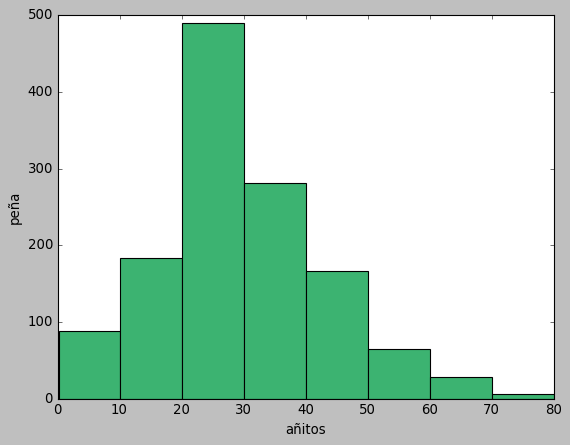

In [22]:
# los histos son buenos para edad

plt.hist(titanic["Age"], 
         edgecolor = "black",
         facecolor = "mediumseagreen", 
         bins = 8)


plt.xlabel("añitos")
plt.ylabel("peña")


plt.show();

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

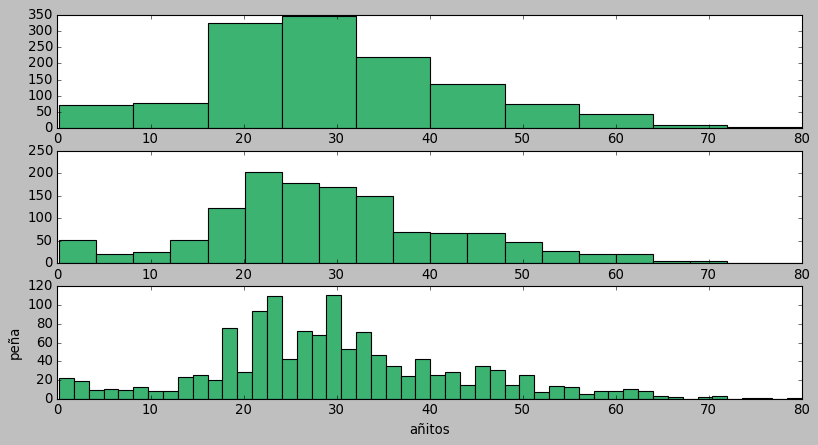

In [37]:
fig, ax = plt.subplots(3, 1) # row, col


ax[0].hist(titanic["Age"], 
         edgecolor = "black",
         facecolor = "mediumseagreen", 
         bins = 10) # fig 1

ax[1].hist(titanic["Age"], 
         edgecolor = "black",
         facecolor = "mediumseagreen", 
         bins = 20) # fig 2

ax[2].hist(titanic["Age"], 
         edgecolor = "black",
         facecolor = "mediumseagreen", 
         bins = 50) # fig 3


plt.xlabel("añitos")
plt.ylabel("peña") # cómo se sube al plot central?


plt.show()

#### Whether the bin size affects your plot? Why?

In [2]:
# sí porque generas más intervalos, se vuelven más estrechos cada vez porque segmentas más
# y menos altos porque se reparten más las edades

#### Use seaborn to show the distribution of the column `Age`

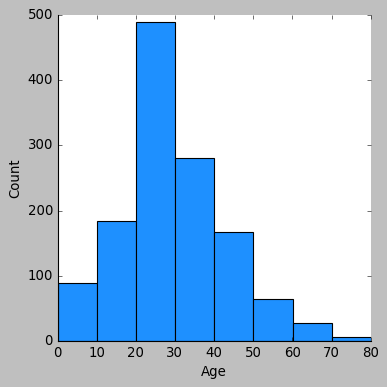

In [25]:
sns.displot(titanic.Age,
            facecolor ='dodgerblue',
            edgecolor = "black",
            bins = 8)

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

In [40]:
titanic.Gender.head(10)

0      male
1    female
2    female
3    female
4      male
5      male
6      male
7      male
8    female
9    female
Name: Gender, dtype: object

In [47]:
df1 = titanic.groupby('Gender').count()['PassengerId'].reset_index()


df1

,Gender,PassengerId
0,female,466
1,male,843


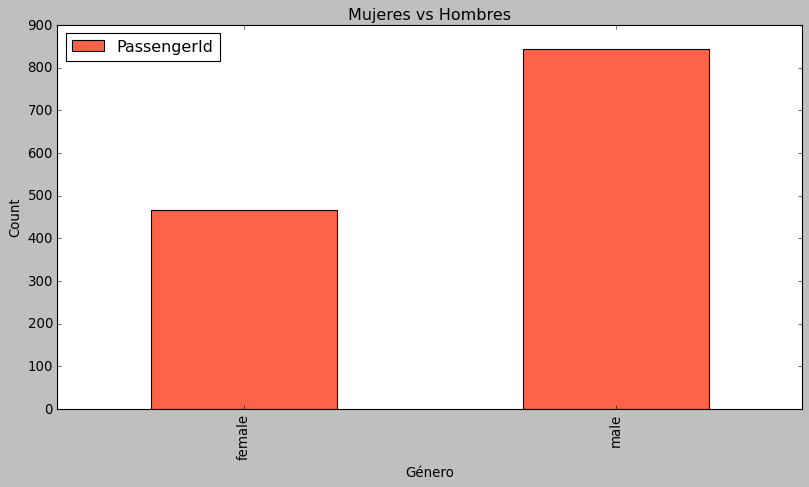

In [48]:
# matplotlib

df1.plot(kind = 'bar', x = 'Gender', y = 'PassengerId', color = 'tomato')


plt.title('Mujeres vs Hombres')
plt.xlabel('Género')
plt.ylabel('Count')


plt.show()

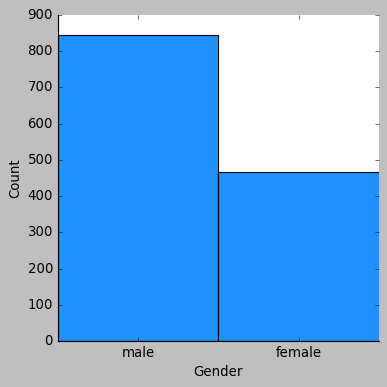

In [33]:
# seaborn

sns.displot(titanic.Gender,
            facecolor ='dodgerblue',
            edgecolor = "black",
            bins = 2)


#### Use the appropriate plot to visualize the column `Pclass` 


In [39]:
titanic.Pclass.head(10)

0    3
1    1
2    3
3    1
4    3
5    3
6    1
7    3
8    3
9    2
Name: Pclass, dtype: int64

In [49]:
df2 = titanic.groupby('Pclass').count()['PassengerId'].reset_index()


df2

,Pclass,PassengerId
0,1,323
1,2,277
2,3,709


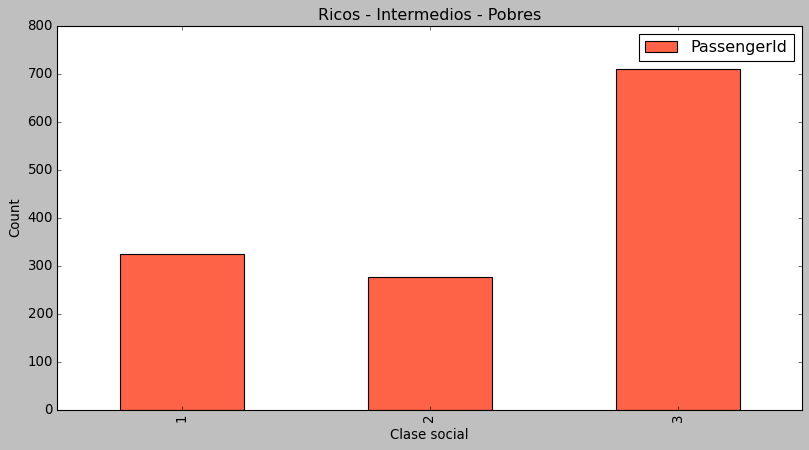

In [51]:
df2.plot(kind = 'bar', x = 'Pclass', y = 'PassengerId', color = 'tomato')


plt.title('Ricos - Intermedios - Pobres')
plt.xlabel('Clase social')
plt.ylabel('Count')


plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

In [52]:
titanic.Age.head(10)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    23.926502
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

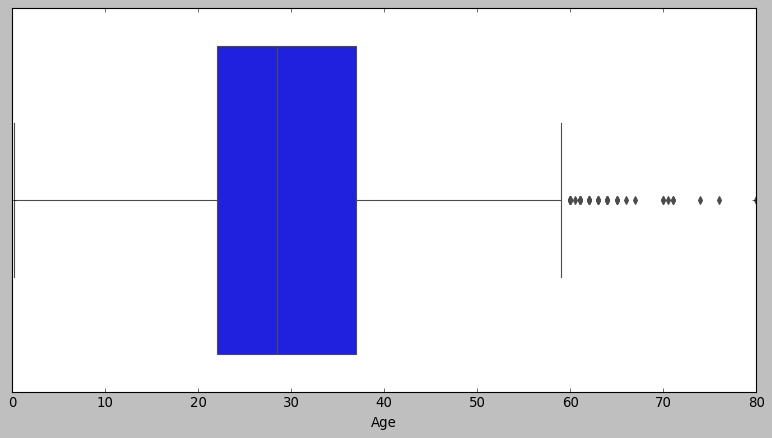

In [57]:
sns.boxplot(x = "Age", data = titanic);

#### What does the previous plot tell you about the feature `Age`? Comment.

In [ ]:
# mínimo = cercano a los 0 años: iban bebés en el barco
# cuartil inferior = alrededor de 22-23: 25% de data inferior a este valor
# mediana = unos 28 añitos
# cuartil superior = alrededor de 36
# máximo = 59
# outlier = valores 3/2 por encima del cuartil superior

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to show below.

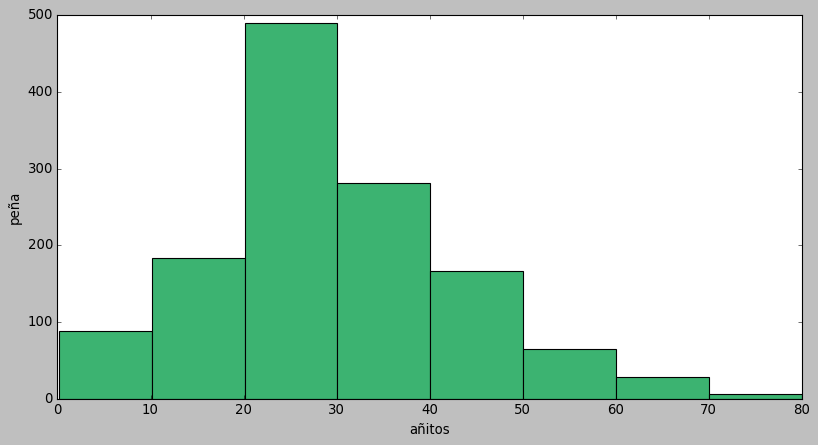

In [58]:
# otra vez???????????????

# los histos son buenos para edad

plt.hist(titanic["Age"], 
         edgecolor = "black",
         facecolor = "mediumseagreen", 
         bins = 8)


plt.xlabel("añitos")
plt.ylabel("peña")


plt.show();

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [59]:
# mínimo: cerca de 0
# máximo: cerca de 80
# mediana: entre 20 y 30
# cantides: 90 de entre 0 y 10, 180 entre 10 y 20, 490 entre 20 y 30...

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

In [62]:
titanic['Fare'].corr(titanic['Age'])

0.17135508596244753

<Axes: xlabel='Fare', ylabel='Age'>

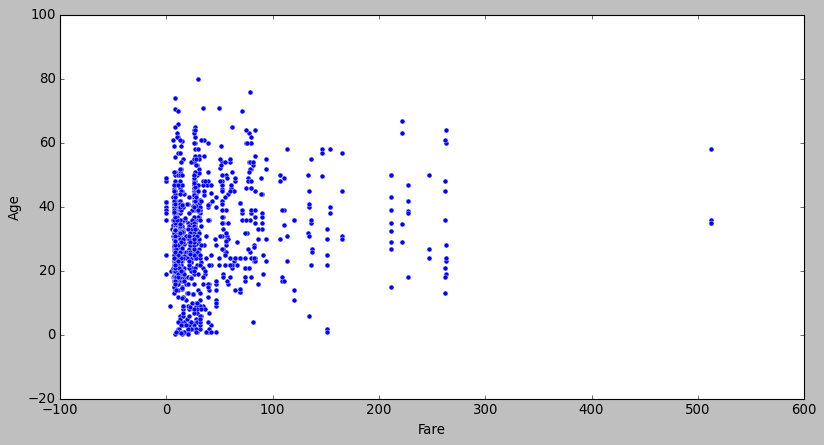

In [70]:
# scatterplot

sns.scatterplot(x = titanic.Fare, y = titanic.Age,  data = titanic)

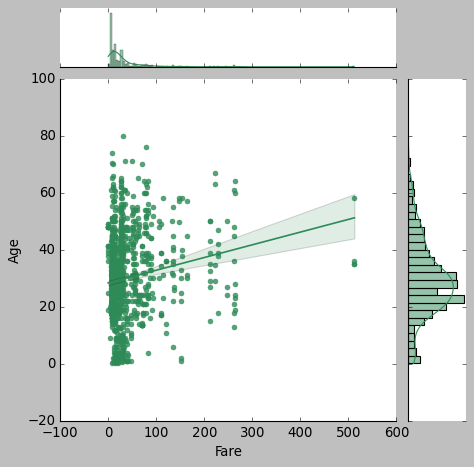

In [68]:
# joinplot
# scatter reg resid kde hex

sns.jointplot(x = titanic['Fare'],
              y = titanic['Age'],
              kind = 'reg',
              color = 'seagreen' )
plt.show();

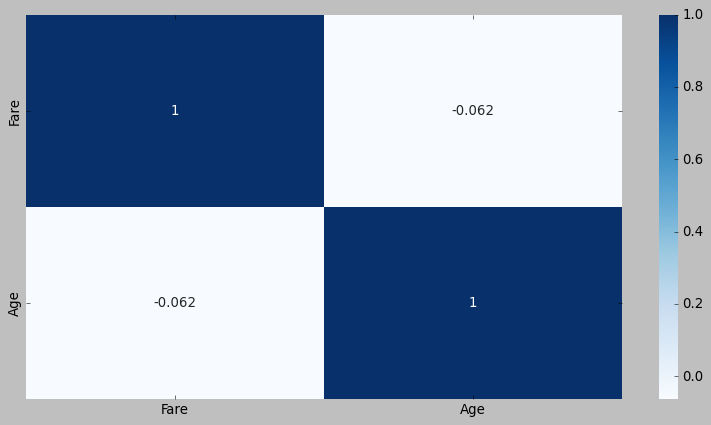

In [81]:
# heatmap

df3 = titanic.groupby('Fare').count()['Age'].reset_index()


sns.heatmap(df3.corr(),
            cmap = "Blues",
            annot = True);

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

/var/folders/q3/mvdqcsqd66g2sjy7y39hmm7c0000gn/T/ipykernel_1819/2740289640.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic.corr(),


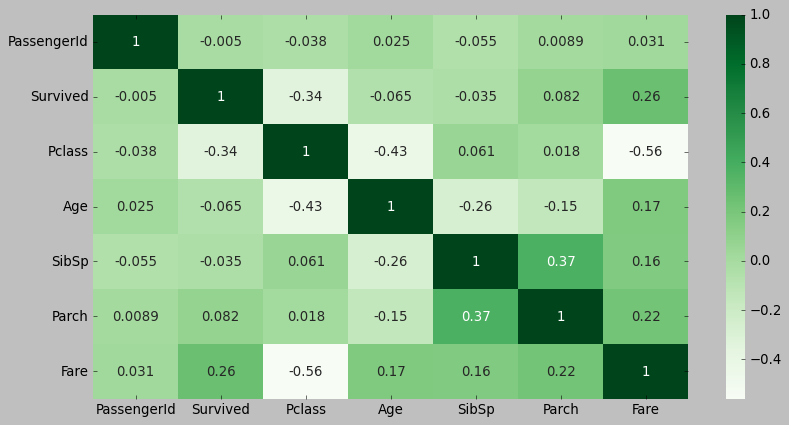

In [80]:
sns.heatmap(titanic.corr(),
            cmap = "Greens",
            annot = True);

#### According to the previous plot, what are the most correlated feature? Comment.

In [ ]:
# survived with fare: obviamente
# pclass with fare: según la clase social pagas más o menos
# age with fare: los viejos pagan más
# survived with pclass: sobreviven más los ricos
# pclass with age: los ricos suelen ser más viejos 

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

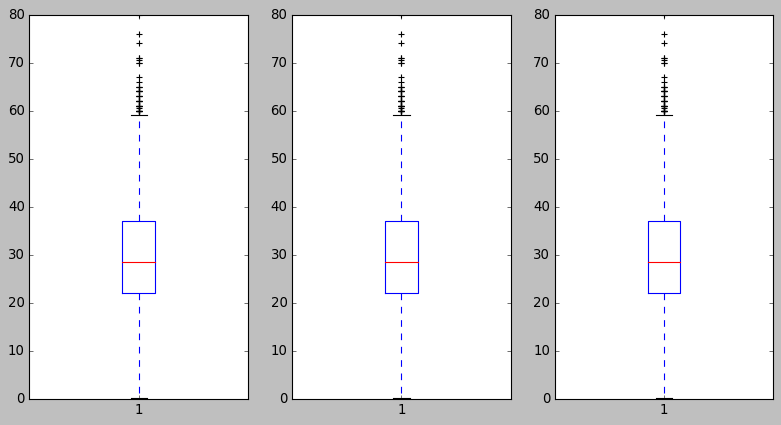

In [84]:
#your code here 3tablas

fig, ax = plt.subplots(1, 3) 

ax[0].boxplot(titanic['Age']) # figura del primer subplot
ax[1].boxplot(titanic['Age']) # figura del segundo subplot
ax[2].boxplot(titanic['Age']) # figura del tercer subplot

plt.show()


#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

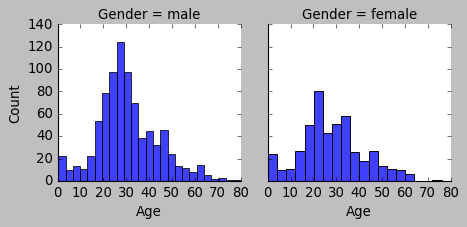

In [90]:
g = sns.FacetGrid(titanic, col = "Gender")
g.map_dataframe(sns.histplot, x = "Age")